###### Table of Contents

## Portal da Queixa

Obter todas as queixas presentes no portal da queixa.

Sobre cada queixa consigo obter a seguinte informação:
    
    ⋅⋅* num reclamacao
    ⋅⋅* titulo
    ⋅⋅* numero
    ⋅⋅* descrição
    ⋅⋅* data
    ⋅⋅* visualizacoes
    ⋅⋅* estado
    ⋅⋅* link para full complaint
    ⋅⋅* gostos
    ⋅⋅* comentarios
    ⋅⋅* nome reclamador
    ⋅⋅* descrição completa

In [58]:
# Bibliotecas Necessárias
from datetime import datetime
#from datetime import datetime
import requests
import time
from tqdm import tqdm
from bs4 import BeautifulSoup
import json
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk

In [59]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [60]:
# tratamento das datas de resolucao de reclamacao
# recebe coluna da data de resolucao da reclamacao

def transform_DateClosed(data):

    if data != '':

        dia = data.split(' ')[0]
        mes = data.split(' ')[1]
        ano = data.split(' ')[2]

        if data.split(' ')[1] == 'Jan' or data.split(' ')[1] == 'janeiro':
            dateClosed = dia + ' Jan ' + ano
        elif data.split(' ')[1] == 'Fev' or data.split(' ')[1] == 'fevereiro':
            dateClosed = dia + ' Feb ' + ano
        elif data.split(' ')[1] == 'Mar' or data.split(' ')[1] == 'março':
            dateClosed = dia + ' Mar ' + ano
        elif data.split(' ')[1] == 'Abr' or data.split(' ')[1] == 'abril':
            dateClosed = dia + ' Apr ' + ano
        elif data.split(' ')[1] == 'Mai' or data.split(' ')[1] == 'maio':
            dateClosed = dia + ' May ' + ano
        elif data.split(' ')[1] == 'Jun' or data.split(' ')[1] == 'junho':
            dateClosed = dia + ' Jun ' + ano
        elif data.split(' ')[1] == 'Jul' or data.split(' ')[1] == 'julho':
            dateClosed = dia + ' Jul ' + ano
        elif data.split(' ')[1] == 'Ago' or data.split(' ')[1] == 'agosto':
            dateClosed = dia + ' Aug ' + ano
        elif data.split(' ')[1] == 'Set' or data.split(' ')[1] == 'setembro':
            dateClosed = dia + ' Sep ' + ano
        elif data.split(' ')[1] == 'Out' or data.split(' ')[1] == 'outubro':
            dateClosed = dia + ' Oct ' + ano
        elif data.split(' ')[1] == 'Nov' or data.split(' ')[1] == 'novembro':
            dateClosed = dia + ' Nov ' + ano
        elif data.split(' ')[1] == 'Dez' or data.split(' ')[1] == 'dezembro':
            dateClosed = dia + ' Dec ' + ano
    else:
        dateClosed = ''
    
    return dateClosed

In [61]:
# tratamento das datas da reclamacao
# recebe coluna da data de reclamacao

def transform_Date(data):

    if data != '':

        dia = data.split(' ')[0]
        mes = data.split(' ')[2]
        ano = data.split(' ')[3]

        if data.split(' ')[2] == 'Jan' or data.split(' ')[2] == 'janeiro':
            date = dia + ' Jan ' + ano
        elif data.split(' ')[2] == 'Fev' or data.split(' ')[2] == 'fevereiro':
            date = dia + ' Feb ' + ano
        elif data.split(' ')[2] == 'Mar' or data.split(' ')[2] == 'março':
            date = dia + ' Mar ' + ano
        elif data.split(' ')[2] == 'Abr' or data.split(' ')[2] == 'abril':
            date = dia + ' Apr ' + ano
        elif data.split(' ')[2] == 'Mai' or data.split(' ')[2] == 'maio':
            date = dia + ' May ' + ano
        elif data.split(' ')[2] == 'Jun' or data.split(' ')[2] == 'junho':
            date = dia + ' Jun ' + ano
        elif data.split(' ')[2] == 'Jul' or data.split(' ')[2] == 'julho':
            date = dia + ' Jul ' + ano
        elif data.split(' ')[2] == 'Ago' or data.split(' ')[2] == 'agosto':
            date = dia + ' Aug ' + ano
        elif data.split(' ')[2] == 'Set' or data.split(' ')[2] == 'setembro':
            date = dia + ' Sep ' + ano
        elif data.split(' ')[2] == 'Out' or data.split(' ')[2] == 'outubro':
            date = dia + ' Oct ' + ano
        elif data.split(' ')[2] == 'Nov' or data.split(' ')[2] == 'novembro':
            date = dia + ' Nov ' + ano
        elif data.split(' ')[2] == 'Dez' or data.split(' ')[2] == 'dezembro':
            date = dia + ' Dec ' + ano
    else:
        date=''
        
    return date

In [62]:
# Obter informacao de cada pagina do Portal da Queixa sobre a fidelidade
def getPaginas():
    resp = requests.get('https://portaldaqueixa.com/brands/fidelidade-companhia-de-seguros-s-a/complaints')
    soup = BeautifulSoup(resp.text, 'html.parser')
    max_paginas = int(soup.findAll(class_="page-link")[6]['data-ci-pagination-page'])
    
    paginas_portal = []
    goNoGo=1
    for i in tqdm(range(1,max_paginas+1)):
        resp = requests.get('https://portaldaqueixa.com/brands/fidelidade-companhia-de-seguros-s-a/complaints?p=' + str(i))

        webpage = resp.text
        soup = BeautifulSoup(webpage, 'html.parser')
        alert = soup.findAll('div', attrs={'class': "alert alert-info"})

        if len(alert)>0:
            break
        else:
            paginas_portal.append(webpage)
    
    return paginas_portal

In [66]:
# Numero de paginas recebidas Portal da Queixa
#len(paginas_portal)

In [64]:
# Para cada pagina recebida obter informacao das reclamacoes
def getReclamacoes(paginas_portal):

    reclamacoes=[]
    for webpage in tqdm(paginas_portal):
        soup = BeautifulSoup(webpage, 'html.parser')
        complaints_page = soup.findAll('a', attrs={'class': "brand-complaint-list-item-anchor"})

        for i in complaints_page:
            reclamacoes.append(i)
    
    return reclamacoes

In [1222]:
# Numero total de reclamacoes no Portal da Queixa
len(reclamacoes)

620

In [67]:
# Scraping de cada Página e desta cada reclamacao de forma a obter o que queremos

def getReclamacoesDados(reclamacoes):

    dicionario = {'id': {}, "company": {}, "title": {}, "description": {}, "date": {}, "status": {}, "date_closed": {}, "days_To_solve": {}, "url": {}, "category": {}, "views": {}, "likes": {}, "comments": {}, 'name': {}, 'description_full': {}, "rating": {}, "return": {}, 'json_complaint': {}}
    dictionary_recl = {'complaints': []}

    i = 0
    goNoGo = 1
    for dados in tqdm(reclamacoes):
        webpage = str(dados)
        soup = BeautifulSoup(webpage, 'html.parser')

        titulo= soup.find(class_="brand-complaint-list-item-title").get_text()

        if titulo != 'Fidelidade - Reclamação privada':
            goNoGo = 1
        else:
            goNoGo = 0
            i=i-1

        if goNoGo == 1:

            numRec = soup.find(class_="brand-complaint-list-item-details").find('h5').get_text()
            descricao= soup.find(class_="brand-complaint-list-item-description").get_text()

            span = soup.findAll('span')

            data = span[1].get_text()

            if data != '':
                data = datetime.strptime(transform_Date(data.strip()), '%d %b %Y').strftime('%Y-%m-%d')
            else:
                data = ''
            estado = span[5].get_text()
            categoria = span[0].get_text()
            visualizacoes = span[2].get_text()
            gostos = span[3].get_text()
            comentarios = span[4].get_text()
            url_full = soup.find('a')['href']

            dicionario["id"].update({i : numRec.strip()})
            dicionario["company"].update({i : titulo.split("-")[0].strip()})
            dicionario["title"].update({i : titulo.split("-")[1].strip()})
            dicionario["description"].update({i : descricao.strip()})
            dicionario["date"].update({i : data})
            dicionario["status"].update({i : estado.strip()})
            dicionario["category"].update({i : categoria.strip()})
            dicionario["views"].update({i : visualizacoes.strip()})
            dicionario["likes"].update({i : gostos.strip()})
            dicionario["comments"].update({i : comentarios.strip()})
            dicionario["url"].update({i : url_full.strip()})

            resp = requests.get(url_full.strip())

            full_webpage = resp.text
            soup_full = BeautifulSoup(full_webpage, 'html.parser')   

            try:
                nome = soup_full.find(class_="d-flex complaint-detail-body-header").find('a')['title']
            except Exception as e:
                nome = '' 
                pass

            try:
                description_full = soup_full.findAll('meta')[9]['content']
            except Exception as e:
                description_full = ''
                pass

            dicionario["name"].update({i : nome.strip()})
            dicionario["description_full"].update({i : description_full.strip()}) 

            if estado.strip() == 'Resolvida':
                try:
                    data_resolvida = soup_full.find(class_="complaint-detail-timeline-item-type").get_text().replace('\n',' ').strip()
                except:
                    data_resolvida = ''

                try:
                    rating = soup_full.find(class_="row complaint-detail-timeline-item-content-feedback").findAll('h1')[0].get_text()
                    voltaria = soup_full.find(class_="row complaint-detail-timeline-item-content-feedback").findAll('h1')[1].get_text()
                except Exception as e:
                    rating = ''
                    voltaria = ''
                    pass
            else:
                data_resolvida = ''
                rating = ''
                voltaria = ''

            if data_resolvida != '':
                data_resolvida = datetime.strptime(transform_DateClosed(data_resolvida), '%d %b %Y').strftime('%Y-%m-%d')
                dias_resolver = days_between(data, data_resolvida)
            else:
                data_resolvida = ''
                dias_resolver = ''


            y = {"id": numRec.strip(), 
                 "company": titulo.split("-")[0].strip(),
                 "title": titulo.split("-")[1].strip(), 
                 "description": descricao.strip(),
                 "date": data,
                 "status": estado.strip(),
                 "date_closed": data_resolvida,
                 "days_To_solve": dias_resolver,
                 "category": categoria.strip(),
                 "views": visualizacoes.strip(),
                 "likes": gostos.strip(),
                 "comments": comentarios.strip(),
                 "url": url_full.strip(),
                 "name": nome.strip(),
                 "description_full": description_full.strip(),
                 "rating": rating,
                 "return": voltaria
                } 

            dicionario['json_complaint'].update({i : y})
            dicionario['date_closed'].update({i: data_resolvida})
            dicionario['rating'].update({i: rating})
            dicionario['return'].update({i: voltaria})
            dicionario['days_To_solve'].update({i: dias_resolver})
            dictionary_recl['complaints'].append(y)  


        i=i+1
    
    return dicionario, dictionary_recl

In [1071]:
pages = getPaginas()
reclamacoes = getReclamacoes(pages)
dicionario, json = getReclamacoesDados(reclamacoes)

df = pd.DataFrame.from_dict(dicionario)
df.head()

100%|██████████| 620/620 [16:25<00:00,  1.59s/it]


,id,company,title,description,date,status,date_closed,days_To_solve,url,category,views,likes,comments,name,description_full,json_complaint,rating,return
0,52957621,Fidelidade,Culpabilização de 50% no sinistro,Esta reclamação incide na prestação dos seguro...,2021-01-14,Aguarda resposta,,,https://portaldaqueixa.com/brands/fidelidade-c...,COMPANHIAS DE SEGUROS,18,0,0,Luis VNGaia,Esta reclamação incide na prestação dos seguro...,"{'id': '52957621', 'company': 'Fidelidade', 't...",,
1,52799221,Fidelidade,Seguro cães,Seguros FIDELIDADE: Contratei um seguro p a mi...,2021-01-12,Aguarda resposta,,,https://portaldaqueixa.com/brands/fidelidade-c...,COMPANHIAS DE SEGUROS,11,0,0,Maria Cristina Tavares Coutinho Lanhoso,Seguros FIDELIDADE:Contratei um seguro p a min...,"{'id': '52799221', 'company': 'Fidelidade', 't...",,
2,52722021,Fidelidade,Baixa do seguro por pagar desde 21/9/2020,Eu trabalhador na área da construção civil no ...,2021-01-11,Aguarda resposta,,,https://portaldaqueixa.com/brands/fidelidade-c...,COMPANHIAS DE SEGUROS,34,0,0,Ricardo Jorge Oliveira,Eu trabalhador na área da construção civil no ...,"{'id': '52722021', 'company': 'Fidelidade', 't...",,
3,52708821,Fidelidade,Não aceitação do valor proposto e ausência de ...,No dia 9 de Novembro fiz a exposição acerca de...,2021-01-11,Aguarda resposta,,,https://portaldaqueixa.com/brands/fidelidade-c...,COMPANHIAS DE SEGUROS,65,0,0,Sofia Alves Duarte,No dia 9 de Novembro fiz a exposição acerca de...,"{'id': '52708821', 'company': 'Fidelidade', 't...",,
4,52613521,Fidelidade,Exigência de escritura para cancelamento de se...,"Boa tarde, Eu tenho um seguro MR na Fidelidade...",2021-01-09,Aguarda resposta,,,https://portaldaqueixa.com/brands/fidelidade-c...,COMPANHIAS DE SEGUROS,113,0,0,Paulo Santos,"Boa tarde,Eu tenho um seguro MR na Fidelidade ...","{'id': '52613521', 'company': 'Fidelidade', 't...",,


In [1083]:
len(df)

619

## Limpeza das reclamações

### Carregamento das stopwords

In [10]:
list_stopwords = nltk.corpus.stopwords.words('portuguese')
len(list_stopwords)

204

### Adicionar mais algumas

In [11]:
list_stopwords.extend([')','&','(',','])

In [12]:
len(list_stopwords)

208

### Dividir Cada Reclamação por frases

#### Isto pode ser utilizado para treinar um modelo NaiveBayes

In [13]:
sents = nltk.sent_tokenize(df['description_full'][0])

sentences=[]
for sentence in sents:
    sentences.append(sentence.strip())

### Tokenização da descrição de cada reclamação

In [11]:
tokens = nltk.word_tokenize(sentences[0])
print (tokens)
for token in tokens:
    print(token)

['Esta', 'reclamação', 'incide', 'na', 'prestação', 'dos', 'seguros', 'em', 'geral', '.']
Esta
reclamação
incide
na
prestação
dos
seguros
em
geral
.


### Remover stopwords da descricao_full

In [14]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

filtered_complaint = {'filtered_reclamacoes': []}


coisa=[]
i=0
for descricao in tqdm(df['description_full']):
    #print(descricao)
    tokens = nltk.word_tokenize(descricao)    

    filtered_content = []
    for token in tokens:
        if token.lower() not in list_stopwords:
            filtered_content.append(token)

    #concat_filtered =TreebankWordDetokenizer().detokenize(filtered_content)
    filtered_complaint['filtered_reclamacoes'].append(TreebankWordDetokenizer().detokenize(filtered_content))
    
    i=i+1

100%|██████████| 619/619 [00:03<00:00, 197.18it/s]


### Análise de Sentimento de cada Reclamação TEXTBLOB

In [18]:
def analize_sentiment(text):
    analysis = TextBlob(text)
    
    if analysis.detect_language() != 'en':
        analysis = TextBlob(str(analysis.translate(to='en')))
        time.sleep(2)    
        
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [19]:
sentimento = []
for rec in tqdm(df['description_full']):
    sentiment = analize_sentiment(rec)
    sentimento.append(sentiment)

100%|██████████| 619/619 [23:56<00:00,  2.32s/it]


In [20]:
df['sentiment'] = sentimento

In [21]:
df['sentiment'] = df['sentiment'].astype(object)

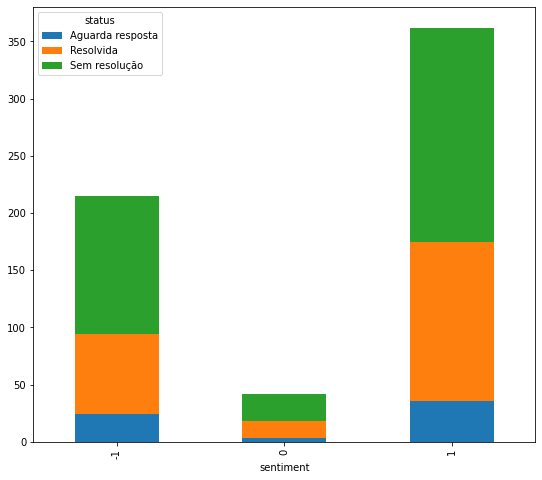

In [22]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,8)
df.groupby(['sentiment','status']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

### Sentimento IBM NLP

In [24]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions
import numpy as np


authenticator = IAMAuthenticator('IILzQ9CbYxb_vJzikAdS30T1uNmbQRkrWIwqwiAJ1Q1K')
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2020-08-01',
    authenticator=authenticator
)

url="https://api.eu-gb.natural-language-understanding.watson.cloud.ibm.com/instances/07570a02-88fd-4c81-a0a8-56c199577728/v1/analyze?version=2019-07-12"
natural_language_understanding.set_service_url(url)

response = natural_language_understanding.analyze(
    text='Seguros FIDELIDADE: Contratei seguro p cadela Jacquie . Acabei fazer FIDELIDADE meti água...Inundação completa VIGARICE! telefone...GDE VIGARICE! Pedi VACINAS (+3€/mês??) pq p jacquie 1/ano, logo n faz sentido.Bem, TUDO ERRADO, nome q soletrado letra letra veio errado.Resumindo: seguro CONTRATADO ficava 13€/mês, q ROUBARAM conta (pq obrigava débito direto) 25€ p``documentação"( online) + 17€/mês...VIGARISTAS! CUIDADO SEGUROS ONLINE! FIDELIDADE? Cuidado, mto aldrabões!',
    features=Features(sentiment=SentimentOptions(document='true'))).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 472,
    "features": 1
  },
  "sentiment": {
    "document": {
      "score": -0.514919,
      "label": "negative"
    }
  },
  "language": "pt"
}


In [25]:

sentiment_label = {'score': {}, 'label': {}}

i=0
for reclamacao in tqdm(filtered_complaint['filtered_reclamacoes']):
    response = natural_language_understanding.analyze(text=reclamacao,
    features=Features(sentiment=SentimentOptions(document='true'))).get_result()
    time.sleep(2)
    sentiment_label['score'].update({i : response['sentiment']['document']['score']})
    sentiment_label['label'].update({i : response['sentiment']['document']['label']})
    
    i=i+1

100%|██████████| 619/619 [25:06<00:00,  2.43s/it]


In [26]:
df_sentiment = pd.DataFrame.from_dict(sentiment_label)

In [28]:
df['sentiment_ibm_score'] = df_sentiment['score']

In [29]:
df['sentiment_ibm'] = df_sentiment['label']

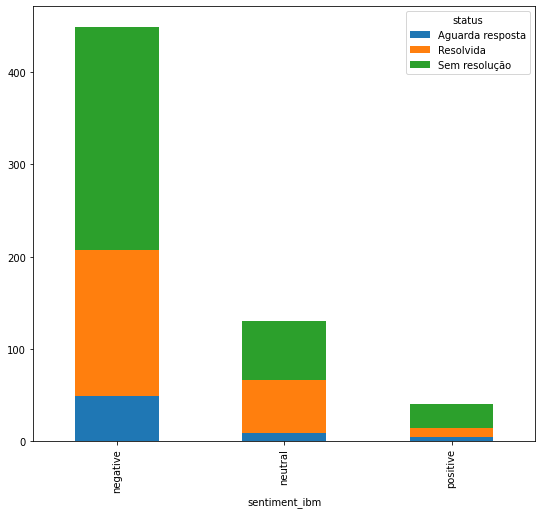

In [31]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,8)
df.groupby(['sentiment_ibm','status']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [105]:
df.days_To_solve.mean()

77.51121076233184

In [106]:
df.columns

Index(['Unnamed: 0', 'id', 'company', 'title', 'description', 'date', 'status',
       'date_closed', 'days_To_solve', 'url', 'category', 'views', 'likes',
       'comments', 'name', 'description_full', 'json_complaint', 'rating',
       'return', 'sentiment', 'wordcloud', 'sentiment_ibm', 'sentiment_label',
       'sentiment_score'],
      dtype='object')

In [114]:
len(df[df['return'] == 'Sim'])

43

In [115]:
len(df[df['return'] == 'Não'])

56

In [124]:
#df['rating'] = df['rating'].fillna('Missing')
len(df[df['rating'] != 'Missing'])

99

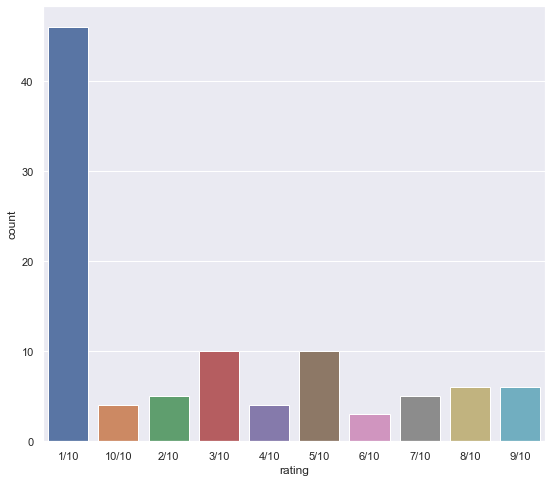

In [34]:
import seaborn as sns

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="rating", data=df.sort_values(by='rating', ascending=True))

## YAKE

### Correr cada reclamação pelo yake

In [32]:
url_api = "https://tm-websuiteapps.ipt.pt/yake/api/v2.0/extract_keywords"

resposta = {}
i=0
for text in tqdm(filtered_complaint['filtered_reclamacoes']):
    
    payload = {'content': text, 'max_ngram_size': 1, 'number_of_keywords': 5}
    r = requests.get(url_api, params=payload)
    resposta.update({i: r.json()})
    i=i+1

100%|██████████| 619/619 [02:24<00:00,  4.27it/s]


In [35]:
resposta[0]['keywords']

[{'ngram': 'dezembro', 'score': 0.04236029175649216},
 {'ngram': 'solução', 'score': 0.06365327062327011},
 {'ngram': 'fidelidade', 'score': 0.08554013984510613},
 {'ngram': 'manobra', 'score': 0.1130666900179257},
 {'ngram': 'embate', 'score': 0.1130666900179257}]

## Text Mining

In [36]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

list_tokens=[]
for descricao in tqdm(filtered_complaint['filtered_reclamacoes']):
    list_tokens.extend(nltk.word_tokenize(descricao))    

100%|██████████| 619/619 [00:01<00:00, 309.97it/s]


In [37]:
len(list_tokens) #depois

47081

In [38]:
dist_words = {'word': {}, 'count': {}}
list_stopwords.extend([',','.',';','!'])
fd = nltk.FreqDist(w.lower() for w in list_tokens if w not in list_stopwords)
i=0
for word in tqdm(list(fd.keys())):
    #print(word, fd[word])
    dist_words['word'].update({i: word})
    dist_words['count'].update({i: fd[word]})
    i=i+1

100%|██████████| 9857/9857 [00:00<00:00, 484135.73it/s]


In [39]:
df_dist_words = pd.DataFrame.from_dict(dist_words).sort_values(by=['count'], ascending=False).reset_index(drop=True)

In [40]:
df_dist_words[:20]

,word,count
0,dia,571
1,fidelidade,553
2,seguro,502
3,companhia,314
4,seguradora,272
5,seguros,234
6,acidente,229
7,carro,224
8,ser,210
9,ter,207


<AxesSubplot:xlabel='word'>

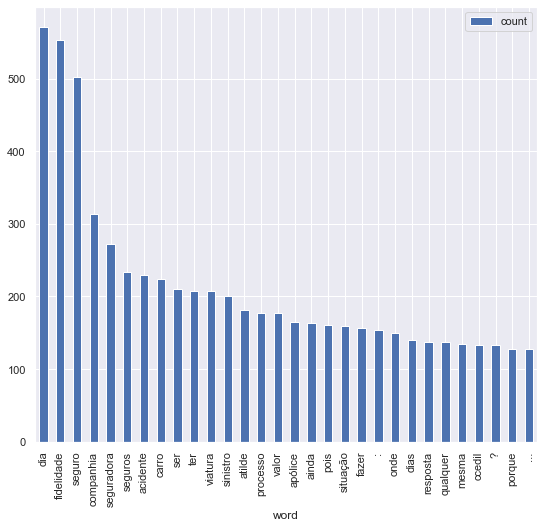

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
df_dist_words[:30].plot(kind='bar',x='word',y='count')

In [142]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(encoding=u'utf-8', lowercase=True, analyzer=u'word',ngram_range = (1, 2))
#CountVectorizer(ngram_range = (1, 2))

In [144]:
freq_vector = count_vect.fit_transform(filtered_complaint['filtered_reclamacoes']) #filtered_complaint['filtered_reclamacoes']
#print (freq_vector)

In [146]:
num_samples, num_features = freq_vector.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))

#samples: 619, #features: 44580


In [147]:
tf_transformer = TfidfTransformer(use_idf=False).fit(freq_vector)
tf_matrix = tf_transformer.transform(freq_vector)
#print(tf_matrix)

In [148]:
tf_matrix[618, 42485]

0.1345345587992625

In [149]:
count_vect.get_feature_names()[42485]

'valor'

In [150]:
tfidf_transformer = TfidfTransformer()
X_train_data_tfidf = tfidf_transformer.fit_transform(tf_matrix)
#print(X_train_data_tfidf)

In [151]:
df = pd.DataFrame(X_train_data_tfidf.toarray(), columns = count_vect.get_feature_names())

In [152]:
df.head()

,00,00 acidente,00 acionar,00 actualmente,00 agora,00 anuais,00 chamava,00 colocaram,00 conta,00 cuc,...,úteis na,úteis vamos,úteis voltei,útil,útil cancelando,útil entretanto,útil estado,útil falta,útil posto,útil telefonemas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.08802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
df.idxmax(axis=1)

0       individuo
1         jacquie
2          medico
3          enviar
4             cgd
          ...    
614        perito
615       coimbra
616    continente
617         artes
618           bmw
Length: 619, dtype: object

In [154]:
valor=[]
i=0
for coluna in list(df.idxmax(axis=1)):
    valor.append(df.iloc[i,][coluna])
    
    i=i+1

In [155]:
import_words_tfidf = pd.DataFrame({'ngram1_2': list(df.idxmax(axis=1)), 'tfidf_value': valor})

In [156]:
max(import_words_tfidf['tfidf_value'].index)

618

In [262]:
import_words_tfidf['ngram1_2'][min(import_words_tfidf['tfidf_value'].index)]

'individuo'

<AxesSubplot:xlabel='ngram1_2'>

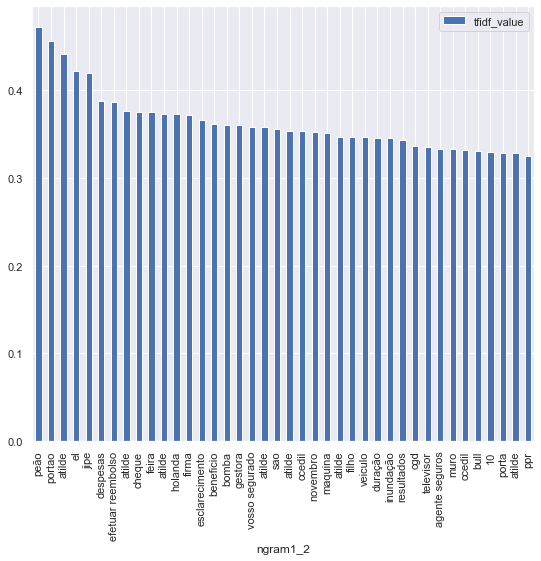

In [164]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
import_words_tfidf.sort_values(by='tfidf_value', ascending=False)[:40].plot(kind='bar',x='ngram1_2',y='tfidf_value')

In [163]:
import_words_tfidf.sort_values(by='tfidf_value', ascending=False)

,ngram1_2,tfidf_value
443,peão,0.472307
519,portao,0.456159
198,atilde,0.441898
305,el,0.422251
403,jipe,0.419843
...,...,...
349,2018 presente,0.112655
3,enviar,0.109013
297,conhecimento,0.108780
7,18,0.103671


In [159]:
max(import_words_tfidf['tfidf_value'])

0.47230745699068305

In [160]:
np.argmax(import_words_tfidf['tfidf_value'])

443

In [162]:
import_words_tfidf.iloc[443]

ngram1_2           peão
tfidf_value    0.472307
Name: 443, dtype: object

## WordCloud - API Keywords

In [44]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
keyword2WordCloud = {}
wordcloud_list=[]
for h in tqdm(range(0,len(resposta))):
    for j in range(0,len(resposta[h]['keywords'])):
        if resposta[h]['keywords'][j]['score'] < 0:
            keyword2WordCloud[resposta[h]['keywords'][j]['ngram']] = 1 
        else:
            keyword2WordCloud[resposta[h]['keywords'][j]['ngram']] = 1 - resposta[h]['keywords'][j]['score'] 
            
    wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate_from_frequencies(keyword2WordCloud) #Objeto que permite gerar wordcloud a partir de texto
    wordcloud_list.append(wordcloud)

100%|██████████| 619/619 [24:04<00:00,  2.33s/it]


In [45]:
df['wordcloud'] = wordcloud_list

In [46]:
df['wordcloud'][618]

(-0.5, 1519.5, 534.5, -0.5)

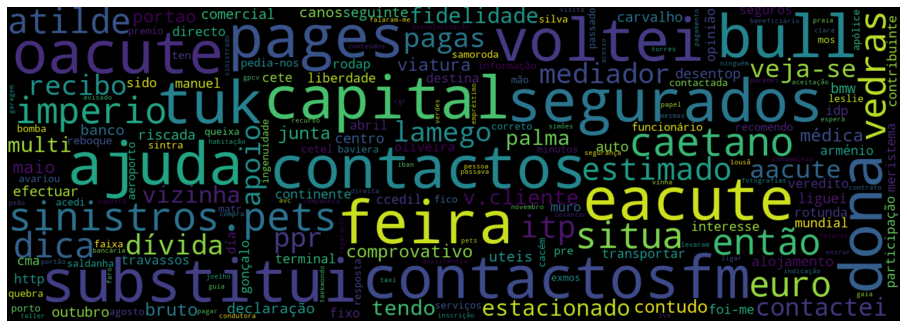

In [47]:
wordcloud_teste = df['wordcloud'][618]
plt.figure(figsize=(16,9))
plt.imshow(wordcloud_teste, interpolation="bilinear") #imshow plota imagens que derivam de arrays
plt.axis("off")

<hr>

In [48]:
df.to_csv('portal_queixa_v2.csv')

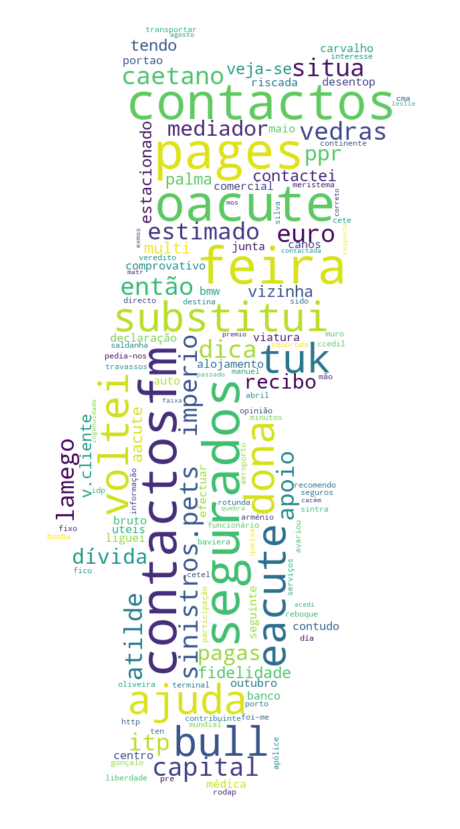

In [49]:
from imageio import imread
import warnings
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
plt.rcParams["figure.figsize"] = (20,15)
warnings.simplefilter('ignore')

twitter_mask = imread('MapaPT.png')

wc = WordCloud(min_font_size=10, max_font_size=300,
                      width=2000, 
                      height=1000,
                      background_color='white', 
                      mode="RGB",
                      mask=twitter_mask,
                      normalize_plurals= True).generate_from_frequencies(keyword2WordCloud) 

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('lula-bolsonaro.png', dpi=500)
plt.show()